In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
%matplotlib inline

In [2]:
def generateData(ratio, total):
    n = int(ratio*total)
    neg = np.clip(np.random.normal(0.4, 0.2, n), a_min = 0, a_max = 1)
    pos = np.clip(np.random.normal(0.7, 0.1, total-n), a_min = 0, a_max = 1)
    labels = [0]*n + [1]*(total-n)
    return neg, pos, labels

/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


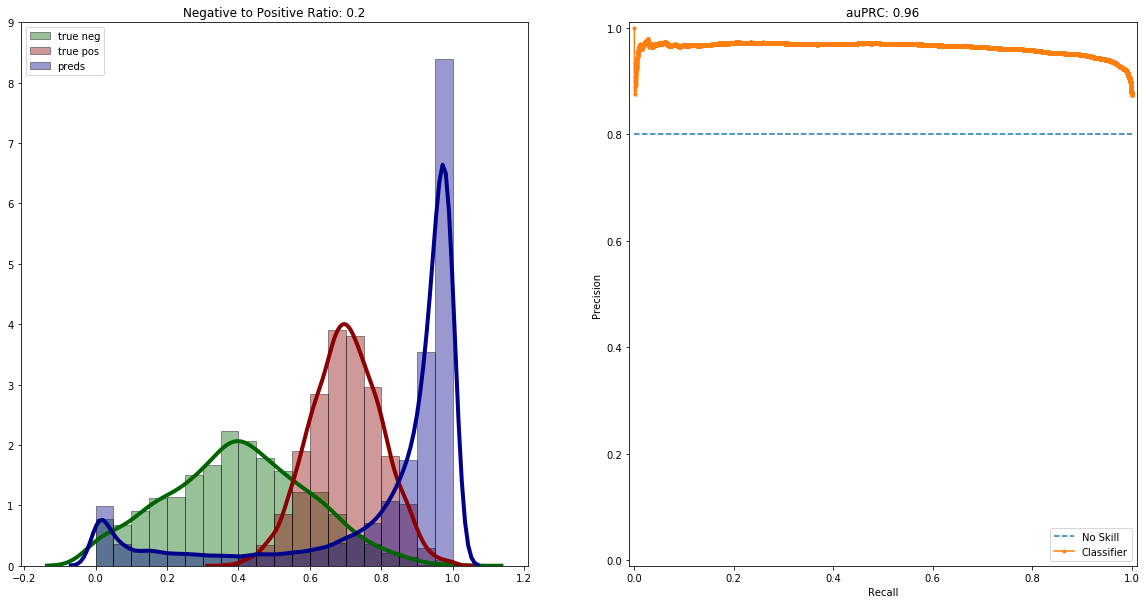

In [3]:
ratio=0.2
neg, pos, labels = generateData(ratio=ratio, total=10000)
preacts = np.concatenate((neg, pos))
f, axes = plt.subplots(1, 2, figsize=(20,10))

axes[0].set_title("Negative to Positive Ratio: "+str(round(ratio, 2)))
sns.distplot(neg, hist=True, kde=True, 
             bins=np.arange(0, 1.1, 0.05), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0], label="true neg")
sns.distplot(pos, hist=True, kde=True, 
             bins=np.arange(0, 1.1, 0.05), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0], label="true pos")
clf = LogisticRegression(random_state=0).fit(preacts.reshape(-1, 1), labels)
preds = clf.predict_proba(preacts.reshape(-1, 1))[:,1]
sns.distplot(preds, hist=True, kde=True, 
             bins=np.arange(0, 1.1, 0.05), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0], label="preds")
axes[0].set_xlim(-0.21, 1.21)
axes[0].set_ylim(0, 9)
axes[0].legend(loc='upper left')

axes[1].set_title("auPRC: "+str(round(average_precision_score(labels, preds), 2)))
lr_precision, lr_recall, _ = precision_recall_curve(labels, preds)
no_skill = sum(labels) / len(labels)
axes[1].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
axes[1].plot(lr_recall, lr_precision, marker='.', label='Classifier')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_xlim(-0.01, 1.01)
axes[1].set_ylim(-0.01, 1.01)
axes[1].legend(loc='lower right')

In [4]:
for idx, ratio in enumerate(np.arange(0.2, 0.91, 0.01)):
    neg, pos, test_labels = generateData(ratio=ratio, total=10000)
    test_preacts = np.concatenate((neg, pos))
    fig, axes = plt.subplots(1, 2, figsize=(20,10))

    axes[0].set_title("Negative to Positive Ratio: "+str(round(ratio, 2)))
    sns.distplot(neg, hist=True, kde=True, 
                 bins=np.arange(0, 1.1, 0.05), color = 'darkgreen', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4}, ax=axes[0], label="true neg")
    sns.distplot(pos, hist=True, kde=True, 
                 bins=np.arange(0, 1.1, 0.05), color = 'darkred', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4}, ax=axes[0], label="true pos")
    preds = clf.predict_proba(test_preacts.reshape(-1, 1))[:,1]
    sns.distplot(preds, hist=True, kde=True, 
                 bins=np.arange(0, 1.1, 0.05), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4}, ax=axes[0], label="preds")
    axes[0].set_xlim(-0.21, 1.21)
    axes[0].set_ylim(0, 9)
    axes[0].legend(loc='upper left')

    axes[1].set_title("auPRC: "+str(round(average_precision_score(test_labels, preds), 2)))
    lr_precision, lr_recall, _ = precision_recall_curve(test_labels, preds)
    #no_skill = sum(test_labels) / len(test_labels)
    axes[1].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    axes[1].plot(lr_recall, lr_precision, marker='.', label='Classifier')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_xlim(-0.01, 1.01)
    axes[1].set_ylim(-0.01, 1.01)
    axes[1].legend(loc='lower right')
    fig.savefig('example_figs/'+str(format(idx, '03'))+'.png')
    plt.close()